## Email Spam detection

### Email spam detection is a crucial application of machine learning and natural language processing (NLP) that involves classifying emails as either spam (unwanted or malicious) or ham (legitimate). This technology helps filter out unwanted emails from users' inboxes, saving time and reducing the risk of falling victim to scams or phishing attacks. Here's a detailed project description for building an email spam detection system:

### Project Objective:
#### The primary objective of this project is to develop a machine learning model that can accurately classify incoming emails as spam or ham based on their content and other relevant features. This helps users filter out unwanted emails and prioritize legitimate ones.

### Dataset:
#### Obtain a labeled dataset of emails, where each email is categorized as either spam or ham. 

### Importing the header files

In [1]:
import pandas as pd
import numpy as np

### Importing the dataset

In [8]:
# Try reading the CSV file with different encodings
encodings = ['utf-8', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/spam.csv", encoding=encoding)
        print(f"Successfully read the CSV file with encoding: {encoding}")
        df.head()
        break  # Stop trying encodings once successful
    except UnicodeDecodeError:
        print(f"Failed to read the CSV file with encoding: {encoding}")


#df=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/spam.csv")
df.head()

Failed to read the CSV file with encoding: utf-8
Successfully read the CSV file with encoding: ISO-8859-1


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data processing

In [16]:
df.rename(columns={'v1': 'label'}, inplace=True)
df.rename(columns={'v2': 'text'}, inplace=True)

In [17]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Data visualisation

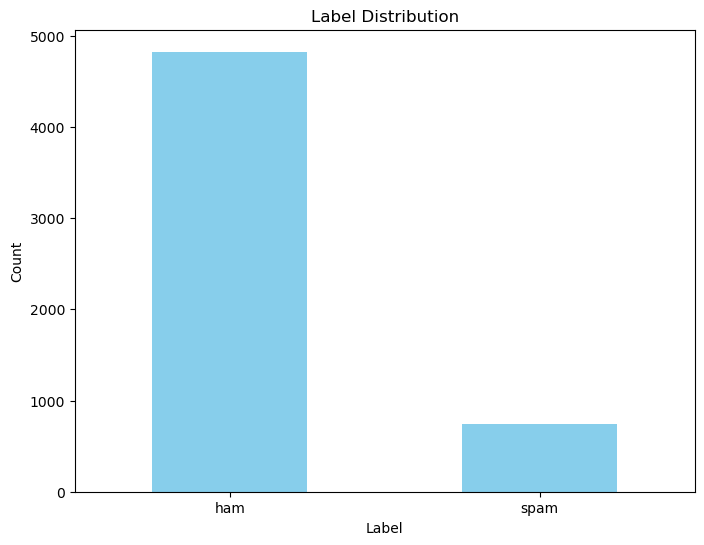

In [84]:
import matplotlib.pyplot as plt

# Calculate the value counts
value_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

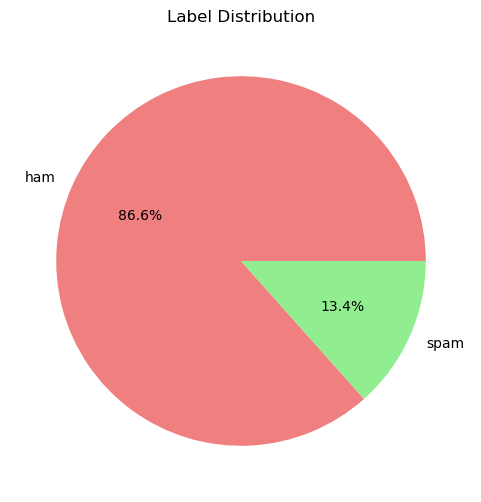

In [85]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Label Distribution')
plt.show()

In [18]:
df.shape

(5572, 5)

In [27]:
# Drop the specified columns without square brackets
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df)

     label                                               text  label_num
0      ham  Go until jurong point, crazy.. Available only ...          0
1      ham                      Ok lar... Joking wif u oni...          0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3      ham  U dun say so early hor... U c already then say...          0
4      ham  Nah I don't think he goes to usf, he lives aro...          0
...    ...                                                ...        ...
5567  spam  This is the 2nd time we have tried 2 contact u...          1
5568   ham              Will Ì_ b going to esplanade fr home?          0
5569   ham  Pity, * was in mood for that. So...any other s...          0
5570   ham  The guy did some bitching but I acted like i'd...          0
5571   ham                         Rofl. Its true to its name          0

[5572 rows x 3 columns]


In [28]:
# Create a new column 'label_numl' based on 'Label'
df['label_num'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Training the dataset

In [29]:
#x is dependent , y is independent , x is text and y is label_num
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.text,df.label_num,test_size=0.2)

In [30]:
X_train.shape

(4457,)

In [31]:
X_test.shape

(1115,)

In [32]:
type(X_train)

pandas.core.series.Series

In [33]:
X_train[:4]

1119    Bored of speed dating? Try SPEEDCHAT, txt SPEE...
250          Ranjith cal drpd Deeraj and deepak 5min hold
2278    Hmm...Bad news...Hype park plaza $700 studio t...
1792    WIN: We have a winner! Mr. T. Foley won an iPo...
Name: text, dtype: object

In [35]:
X_train[:4][2278]

'Hmm...Bad news...Hype park plaza $700 studio taken...Only left 2 bedrm-$900...'

In [36]:
type(y_train)

pandas.core.series.Series

In [37]:
y_train[:4]

1119    1
250     0
2278    0
1792    1
Name: label_num, dtype: int64

In [38]:
type(X_train.values)

numpy.ndarray

### Using Natural Language Processing 

#### Converting words to matrix

In [39]:
#Getting the matrix of words
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_cv=v.fit_transform(X_train.values)
X_train_cv

<4457x7744 sparse matrix of type '<class 'numpy.int64'>'
	with 58600 stored elements in Compressed Sparse Row format>

In [40]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
X_train_cv.shape

(4457, 7744)

In [43]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûï', 'ûò', 'ûówell'], dtype=object)

In [44]:
v.get_feature_names_out().shape  #vocabulary

(7744,)

In [45]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'bui

In [46]:
v.vocabulary_

{'bored': 1440,
 'of': 4870,
 'speed': 6349,
 'dating': 2175,
 'try': 7039,
 'speedchat': 6350,
 'txt': 7077,
 'to': 6915,
 '80155': 645,
 'if': 3596,
 'you': 7688,
 'don': 2409,
 'like': 4105,
 'em': 2562,
 'swap': 6627,
 'and': 968,
 'get': 3110,
 'new': 4740,
 'chatter': 1749,
 'chat80155': 1747,
 'pobox36504w45wq': 5244,
 '150p': 308,
 'msg': 4603,
 'rcd': 5555,
 '16': 319,
 'ranjith': 5542,
 'cal': 1603,
 'drpd': 2467,
 'deeraj': 2216,
 'deepak': 2213,
 '5min': 563,
 'hold': 3460,
 'hmm': 3447,
 'bad': 1198,
 'news': 4744,
 'hype': 3565,
 'park': 5062,
 'plaza': 5219,
 '700': 613,
 'studio': 6521,
 'taken': 6672,
 'only': 4921,
 'left': 4061,
 'bedrm': 1285,
 '900': 730,
 'win': 7502,
 'we': 7396,
 'have': 3353,
 'winner': 7513,
 'mr': 4598,
 'foley': 2917,
 'won': 7558,
 'an': 963,
 'ipod': 3729,
 'more': 4570,
 'exciting': 2689,
 'prizes': 5401,
 'soon': 6299,
 'so': 6259,
 'keep': 3907,
 'eye': 2729,
 'on': 4910,
 'ur': 7184,
 'mobile': 4528,
 'or': 4952,
 'visit': 7289,
 'www'

In [48]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûï', 'ûò', 'ûówell'], dtype=object)

In [49]:
X_train_np=X_train_cv.toarray()
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
np.where(X_train_np[0]!=0)

(array([ 308,  319,  645,  968, 1440, 1747, 1749, 2175, 2409, 2562, 3110,
        3596, 4105, 4603, 4740, 4870, 5244, 5555, 6349, 6350, 6627, 6915,
        7039, 7077, 7688], dtype=int64),)

In [51]:
X_train[:4]

1119    Bored of speed dating? Try SPEEDCHAT, txt SPEE...
250          Ranjith cal drpd Deeraj and deepak 5min hold
2278    Hmm...Bad news...Hype park plaza $700 studio t...
1792    WIN: We have a winner! Mr. T. Foley won an iPo...
Name: text, dtype: object

In [52]:
X_train[4013]

"Sorry, I can't text &amp; drive coherently, see you in twenty"

In [53]:
X_train_np[0][140]  #not equal to 0

0

### Using naive bayes multinomial model as naive based is the best model to classify between two objects

In [54]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [55]:
X_test_cv=v.transform(X_test)

In [56]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       973
           1       0.98      0.92      0.95       142

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [59]:
test_email = ["Hey!, can we meet tomorrow?",
              "Congratulations, you have won a lottery ticket worth $100000"]


In [60]:
test_email_count=v.transform(test_email)
model.predict(test_email_count)

array([0, 1], dtype=int64)

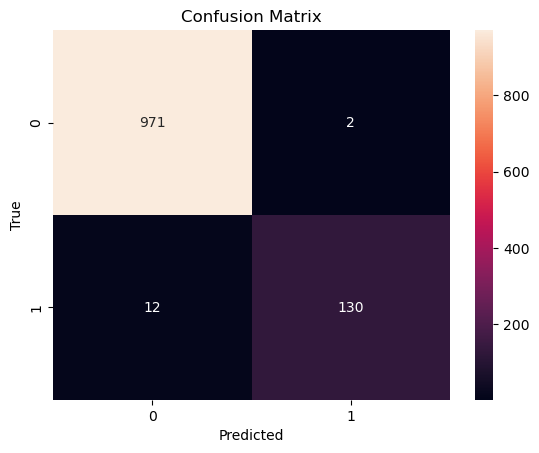

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

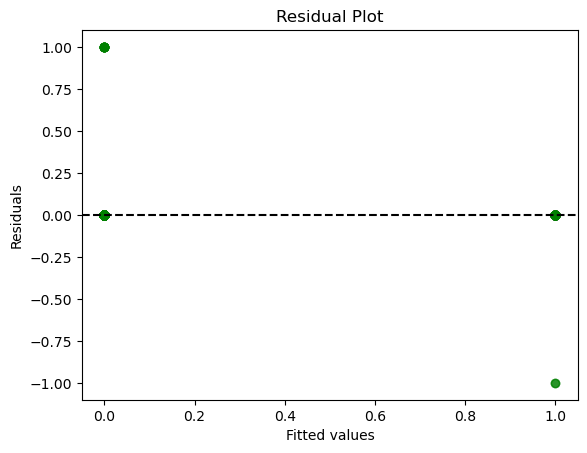

In [80]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of fitted values (y_pred) vs. residuals
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

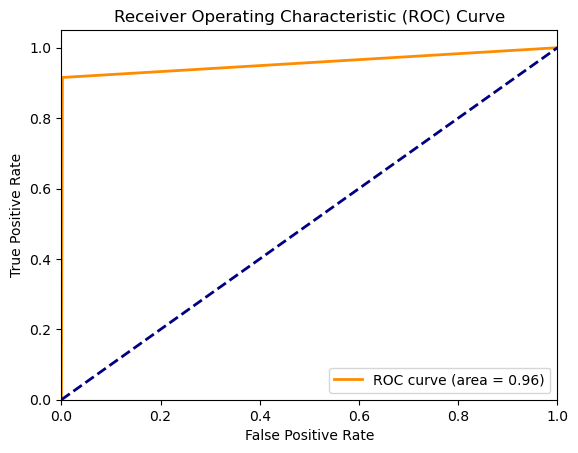

In [81]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

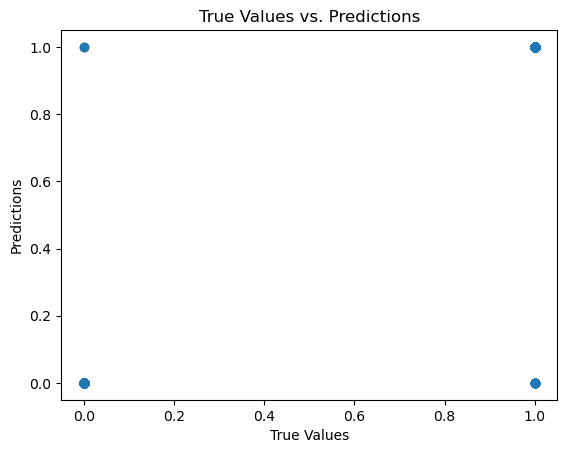

In [82]:
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

In [61]:
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),
              ('nb',MultinomialNB())])

In [62]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [63]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       973
           1       0.98      0.92      0.95       142

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



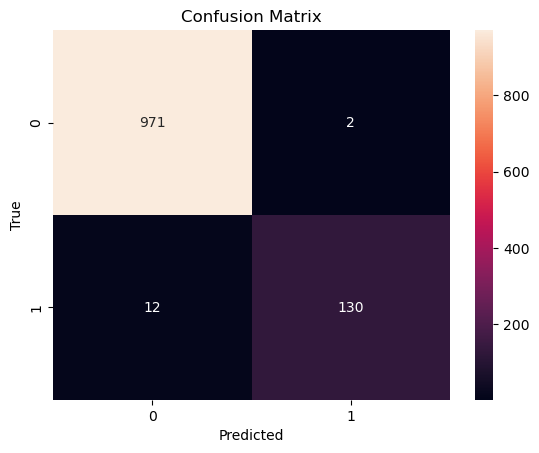

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

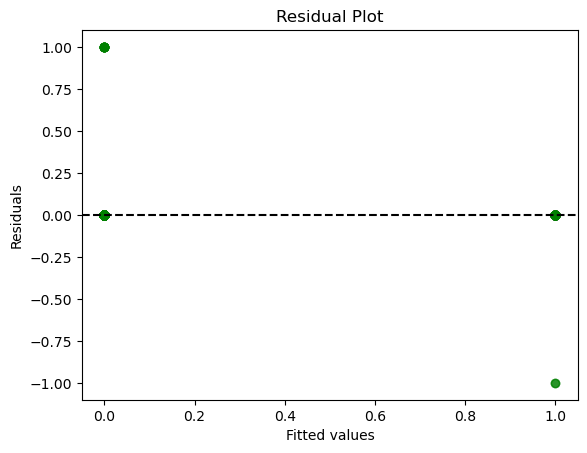

In [79]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of fitted values (y_pred) vs. residuals
plt.scatter(y_pred, residuals, c='g', alpha=0.6)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')  # Add a horizontal line at y=0
plt.show()

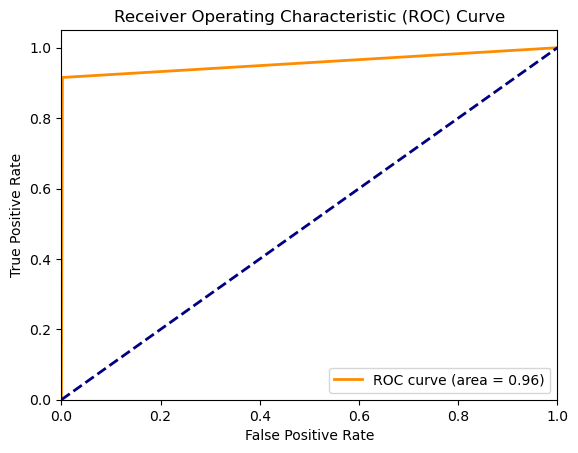

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


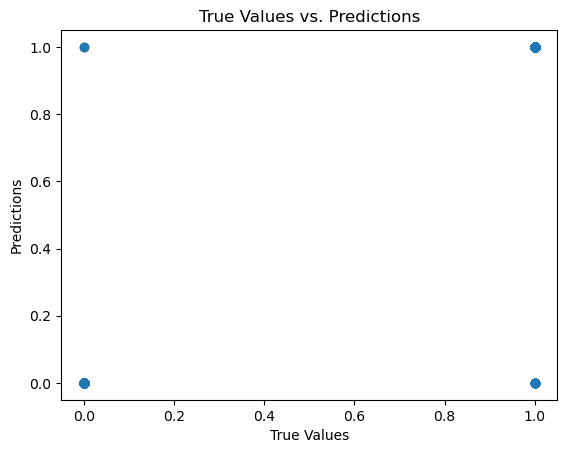

In [73]:
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

### The result obtained by NLP and machine learning is almost same.
### The precision score is 0.99 from both the algorithms.